In [1]:
import numpy as np
import sqlite3
import MDSplus as mds
import scipy.fftpack as fft

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

In [3]:
connection = sqlite3.connect('shots.db')
connection.row_factory = sqlite3.Row
cursor = connection.cursor()
cursor.execute("SELECT * FROM Shots")
rows = cursor.fetchall()
cursor.close()
connection.close()
first_shot = rows[0]

In [4]:
shot = first_shot
first_shot.keys()

['shot',
 'exists_in_shotlog',
 'exists_in_mdsplus',
 'campaigns',
 'fiducial_a_node',
 'fiducial_b_node',
 'bias_current_node',
 'fiducial_a_signal_exists',
 'fiducial_b_signal_exists',
 'bias_current_signal_exists',
 'bias_current_on',
 'bias_current_pre_crowbar_regular',
 'fiducial_ocillates',
 'phase_reference_time_idl_code_succeeded',
 'ramp_reference_time_idl_code_succeeded',
 'zero_phase_time',
 'zero_phase_index',
 'period',
 'ramp_time',
 'ramp_index',
 'mach_insertion',
 'mach_signals_exist',
 'mach_oscillates',
 'mach_x_read',
 'mach_x',
 'mach_y_read',
 'mach_y',
 'mach_z',
 'mach_orientation',
 'mach_orientation_read',
 'mach_r_node',
 'mach_l_node',
 'mach_l_2_node',
 'mach_r_termination_ohm',
 'mach_l_termination_ohm',
 'mach_r_monitor_pearson_model',
 'mach_l_monitor_pearson_model',
 'mach_l_2_termination_ohm',
 'mach_l_2_monitor_pearson_model',
 'mach_r_loops',
 'mach_l_loops',
 'mach_l_2_loops',
 'mach_r_monitor_volts_per_amp',
 'mach_l_monitor_volts_per_amp',
 'mach_

In [5]:
print shot['bias_current_signal_exists']
print shot['fiducial_a_signal_exists']
bias_current_node_name = shot['bias_current_node']
fiducial_a_node_name = shot['fiducial_a_node']

1
1


In [6]:
tree = mds.Tree('rsx', shot['shot'])
bias_current_node = tree.getNode(bias_current_node_name)
bias_current_data = bias_current_node.getData()
bias_current = np.asarray(bias_current_data.getValue())
bias_current_time = np.asarray(bias_current_data.getDimensions()[0])*1e-3


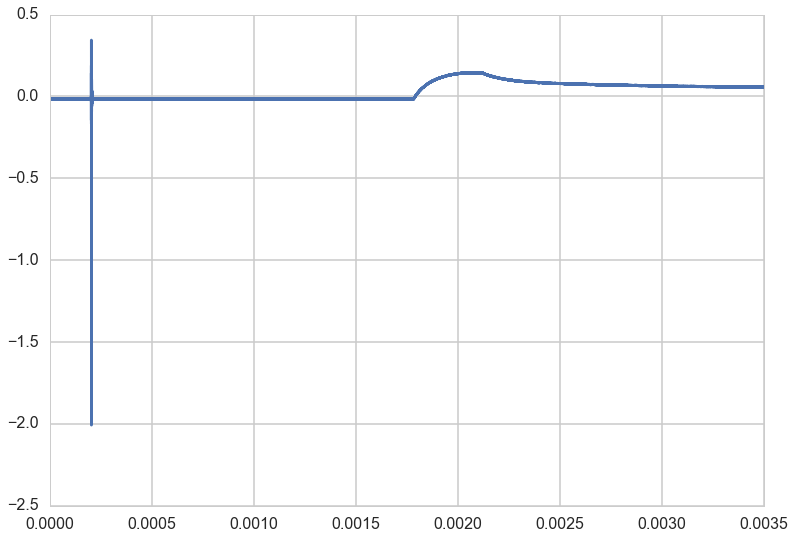

In [7]:
plt.plot(bias_current_time, bias_current)

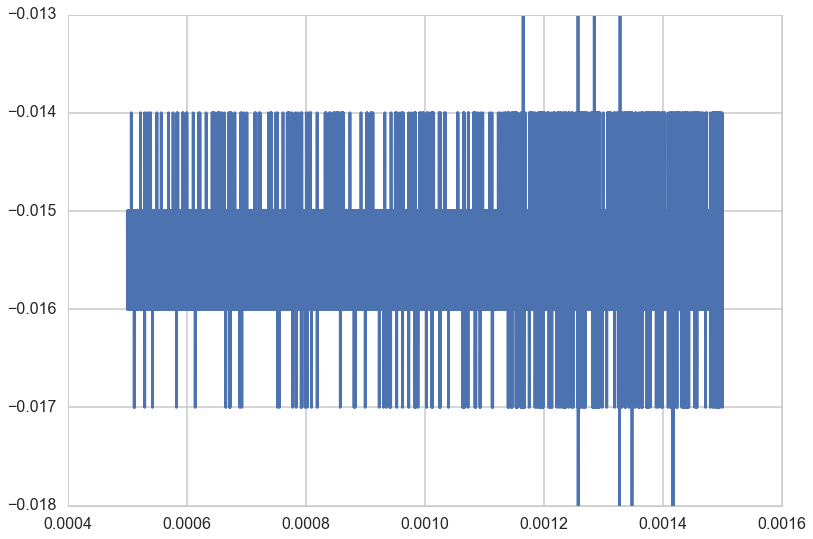

In [11]:
plt.plot(bias_current_time[10000:30000], bias_current[10000:30000])

# Look for shots that fall below a threhold current

In [510]:
for shot in rows:
    if shot['exists_in_mdsplus'] and shot['exists_in_shotlog'] and shot['bias_current_signal_exists']:
        tree = mds.Tree('rsx', shot['shot'])
        bias_current_node = tree.getNode(bias_current_node_name)
        bias_current_data = bias_current_node.getData()
        bias_current = np.asarray(bias_current_data.getValue())
        bias_current_time = np.asarray(bias_current_data.getDimensions()[0])*1e-3
    
        ref_tree = mds.Tree('rsx', shot['shot'])
        ref_bias_current_node = ref_tree.getNode(bias_current_node_name)
        ref_bias_current_data = ref_bias_current_node.getData()
        ref_bias_current = np.asarray(ref_bias_current_data.getValue())
        ref_bias_current_time = np.asarray(ref_bias_current_data.getDimensions()[0])*1e-3
    
        if bias_current[10000:].max() <= ref_bias_current[10000:].max() * 0.75:
            print 'bias current does not reach threshold in shot %i' % shot['shot']

bias current does not reach threshold in shot 15305
bias current does not reach threshold in shot 15306
bias current does not reach threshold in shot 15336
bias current does not reach threshold in shot 15352
bias current does not reach threshold in shot 15408
bias current does not reach threshold in shot 15410
bias current does not reach threshold in shot 15418
bias current does not reach threshold in shot 15424
bias current does not reach threshold in shot 15471
bias current does not reach threshold in shot 15509
bias current does not reach threshold in shot 15623
bias current does not reach threshold in shot 15657
bias current does not reach threshold in shot 15658
bias current does not reach threshold in shot 15659
bias current does not reach threshold in shot 15660
bias current does not reach threshold in shot 15661
bias current does not reach threshold in shot 15695
bias current does not reach threshold in shot 15798
bias current does not reach threshold in shot 15834
bias current

# Determine max current

In [13]:
tree = mds.Tree('rsx', 15409)
bias_current_node = tree.getNode(bias_current_node_name)
bias_current_data = bias_current_node.getData()
bias_current = np.asarray(bias_current_data.getValue())
bias_current_time = np.asarray(bias_current_data.getDimensions()[0])*1e-3

39991 40000 39991
39991 40000


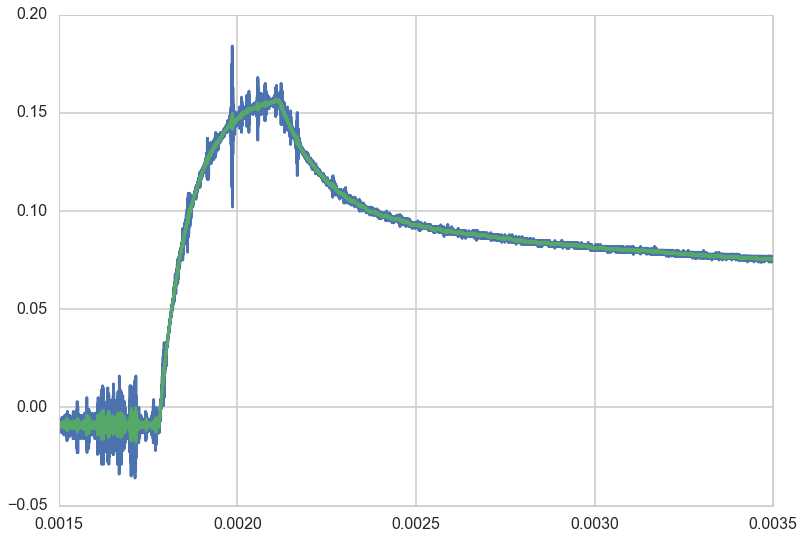

In [512]:
signal_to_filter = bias_current[30000:]
time_to_filter = bias_current_time[30000:]

window_len = 10
w = np.ones(window_len,'d')
y=np.convolve(w/w.sum(), signal_to_filter ,mode='valid')
print y.size, signal_to_filter.size, time_to_filter[4:-5].size
plt.plot(time_to_filter, signal_to_filter)
plt.plot(time_to_filter[4:-5], y)
print y.size, signal_to_filter.size

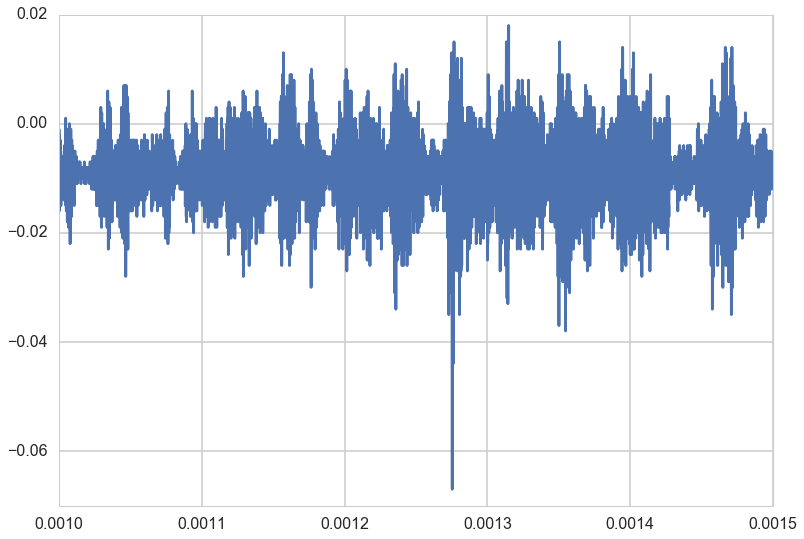

In [15]:
plt.plot(bias_current_time[20000:30000], bias_current[20000:30000])

In [513]:
tree = mds.Tree('rsx', 15416)
bias_current_node = tree.getNode(bias_current_node_name)
bias_current_data = bias_current_node.getData()
bias_current = np.asarray(bias_current_data.getValue())
bias_current_time = np.asarray(bias_current_data.getDimensions()[0])*1e-3

39991 40000 39991
39991 40000


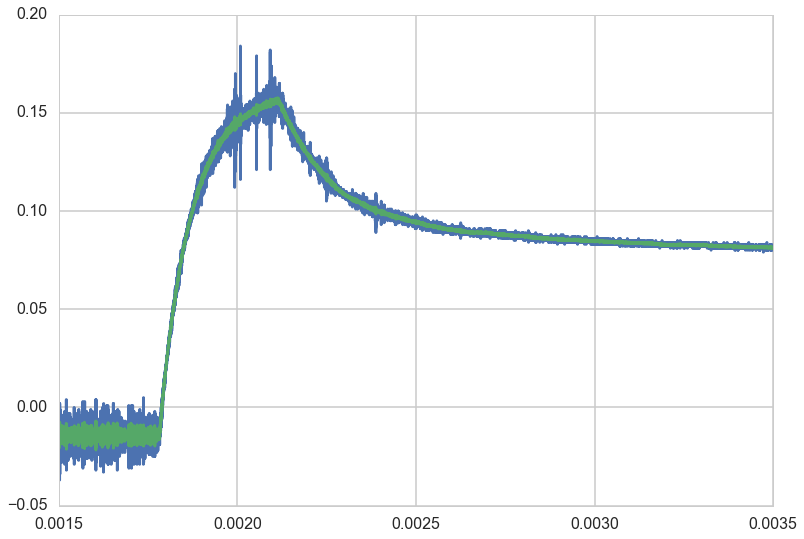

In [518]:
signal_to_filter = bias_current[30000:]
time_to_filter = bias_current_time[30000:]

window_len = 10
w = np.ones(window_len, 'd')
y=np.convolve(w/w.sum(), signal_to_filter ,mode='valid')
print y.size, signal_to_filter.size, time_to_filter[4:-5].size
plt.plot(time_to_filter, signal_to_filter)
plt.plot(time_to_filter[4:-5], y)
print y.size, signal_to_filter.size

In [519]:
tree = mds.Tree('rsx', 15420)
bias_current_node = tree.getNode(bias_current_node_name)
bias_current_data = bias_current_node.getData()
bias_current = np.asarray(bias_current_data.getValue())
bias_current_time = np.asarray(bias_current_data.getDimensions()[0])*1e-3

39251 40000 39251
39251 40000


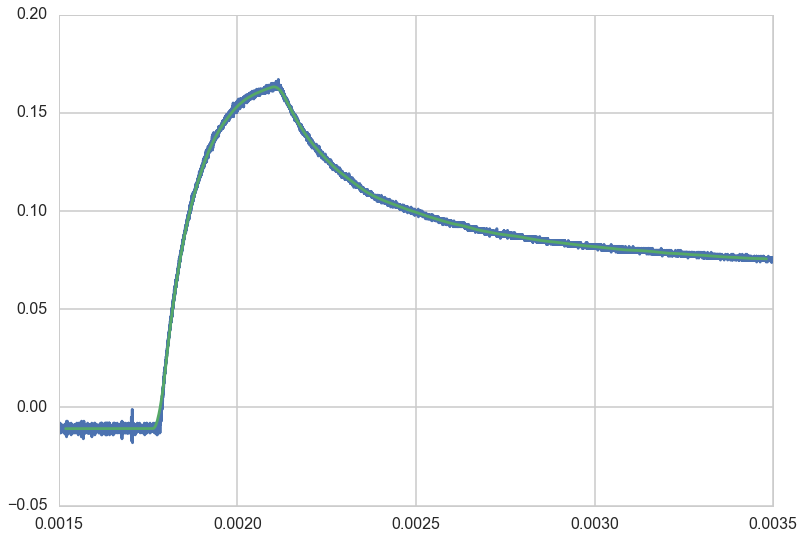

In [520]:
signal_to_filter = bias_current[30000:]
time_to_filter = bias_current_time[30000:]

window_len = 750
w = np.ones(window_len,'d')
y=np.convolve(w/w.sum(), signal_to_filter ,mode='valid')
print y.size, signal_to_filter.size, time_to_filter[374:-375].size
plt.plot(time_to_filter, signal_to_filter)
plt.plot(time_to_filter[374:-375], y)
print y.size, signal_to_filter.size

40000 40000 39251
40000 40000


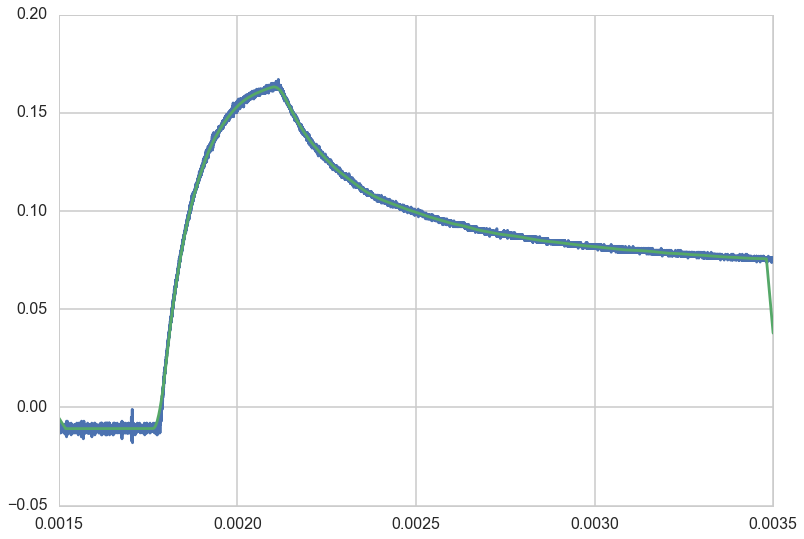

In [522]:
signal_to_filter = bias_current[30000:]
time_to_filter = bias_current_time[30000:]

window_len = 750
w = np.ones(window_len,'d')
y=np.convolve(w/w.sum(), signal_to_filter ,mode='same')
print y.size, signal_to_filter.size, time_to_filter[374:-375].size
plt.plot(time_to_filter, signal_to_filter)
plt.plot(time_to_filter, y)
print y.size, signal_to_filter.size

In [369]:
# Can find 

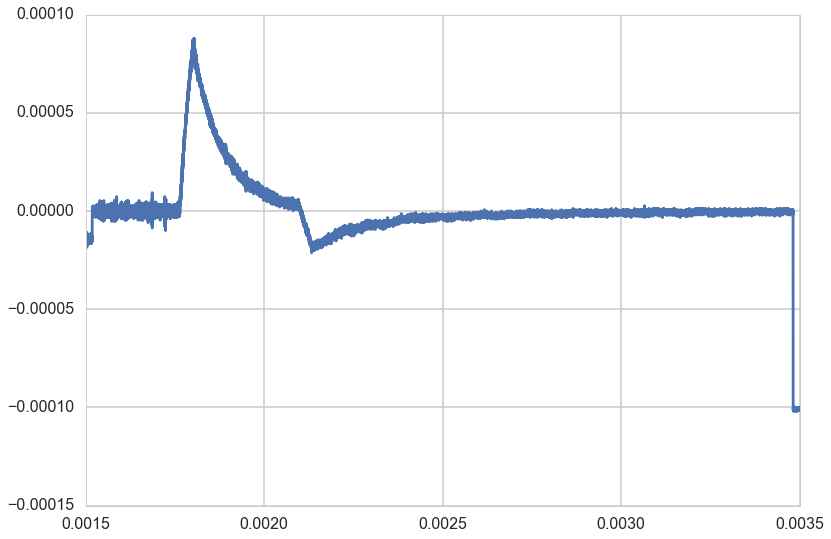

In [524]:
plt.plot(time_to_filter, np.gradient(y))

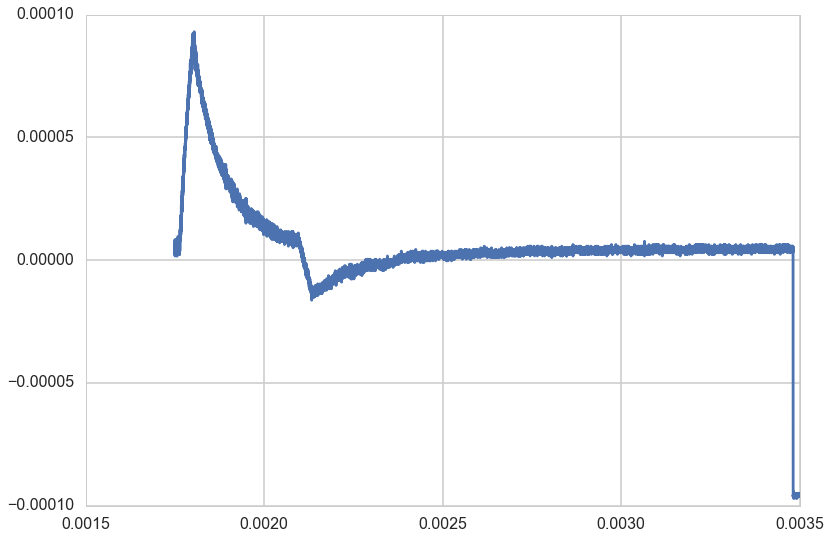

In [526]:
plt.plot(time_to_filter[5000:], np.gradient(y)[5000:]+0.000005)

In [378]:
np.where(np.diff(np.sign(np.gradient(y[6000:]+0.000005))))[0]

array([ 5629,  5630,  5631, ..., 33243, 33244, 33246])

In [380]:
time_to_filter[499:-500][6000:][5629]

0.0021064002

# Look at fft of fiducial, record signal strength, window at which frequency starts

### First what is the distribution of periods determined by Jason's Script

In [17]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute('SELECT period FROM Shots WHERE fiducial_a_signal_exists=1 AND bias_current_signal_exists=1')
periods = cursor.fetchall()

In [18]:
cleaned_periods = []
for period in periods:
    if period[0] == None:
        pass
    else:
        cleaned_periods.append(period[0])
cleaned_periods = np.asarray(cleaned_periods)    

In [19]:
cleaned_periods.size

2095

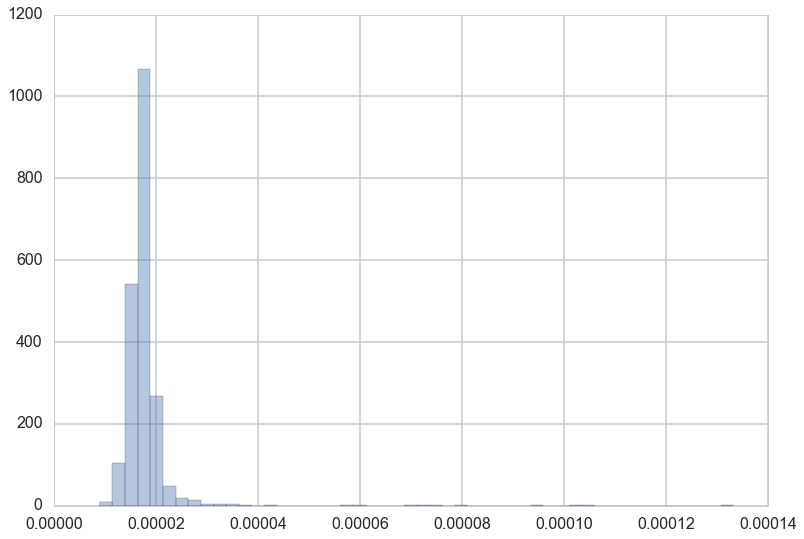

In [20]:
sns.distplot(cleaned_periods, norm_hist=False, kde=False)

In [21]:
cleaned_periods.mean()

1.7753055709056326e-05

In [22]:
cleaned_periods.std()

5.5611730431042248e-06

In [23]:
cleaned_frequencies = 1/cleaned_periods

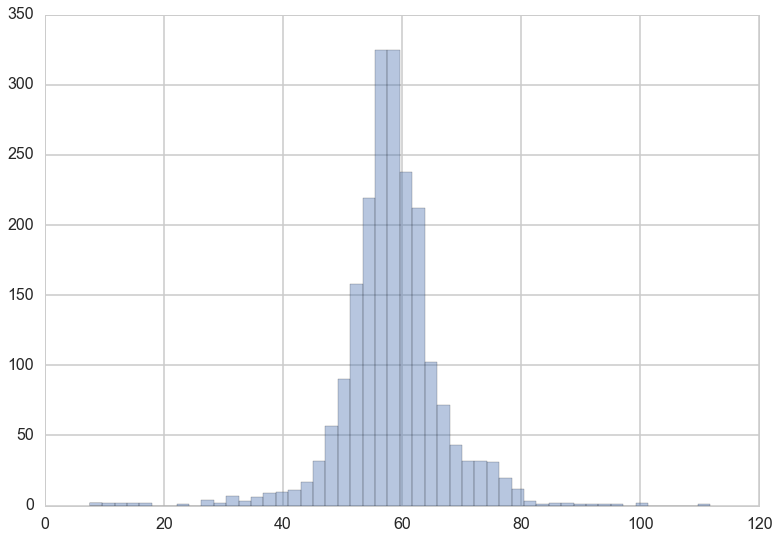

In [24]:
sns.distplot(cleaned_frequencies/1000, norm_hist=False, kde=False)

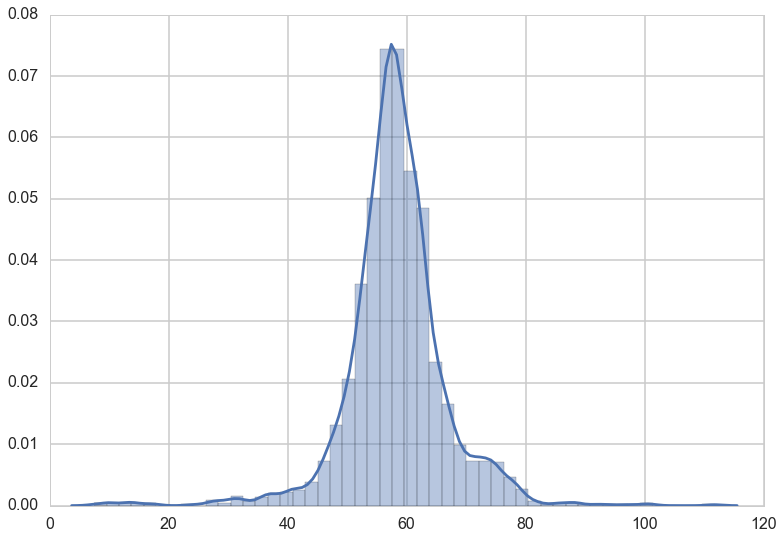

In [25]:
sns.distplot(cleaned_frequencies/1000, norm_hist=False)

In [456]:
cleaned_frequencies.mean()

58254.056383850373

In [28]:
cleaned_frequencies.std(ddof=1)

8388.436120787459

# The gryration frquency over the 3000 shots is $f=58kHz \pm 8kHz$

In [244]:
print "The mean oscillation frequency is %(freq)5.2e" % {'freq': 1/cleaned_periods.mean()}

The mean oscillation frequency is 5.63e+04


In [232]:
print ("68 percent of the frequency measuremnts lie between %(low)5.2e and %(high)5.2e" % 
       {'low': 1/(cleaned_periods.mean() - cleaned_periods.std()),
        'high': 1/(cleaned_periods.mean() + cleaned_periods.std())})

68 percent of the frequency measuremnts lie between 8.20e+04 and 4.29e+04


# Let's look at the frequency spectrum of a shot with oscillation 15432 and one without 15557

In [241]:
tree = mds.Tree('rsx', 15423)
fiducial_node = tree.getNode(fiducial_a_node_name)
fiducial_data = fiducial_node.getData()
fiducial_with_oscillation = np.asarray(fiducial_data.getValue())
fiducial_time = np.asarray(fiducial_data.getDimensions()[0])*1e-3

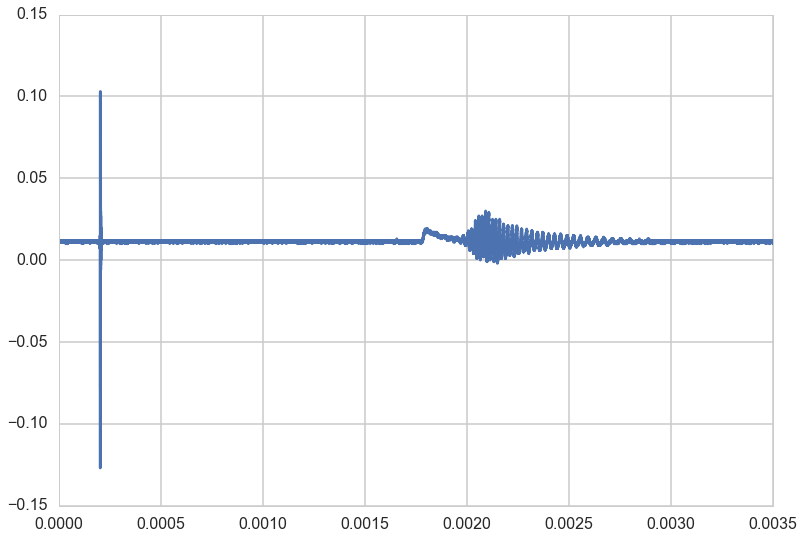

In [242]:
plt.plot(fiducial_time, fiducial_with_oscillation)

# Even taken a fft of the whole signal the 56kHz spectrum does stick out 

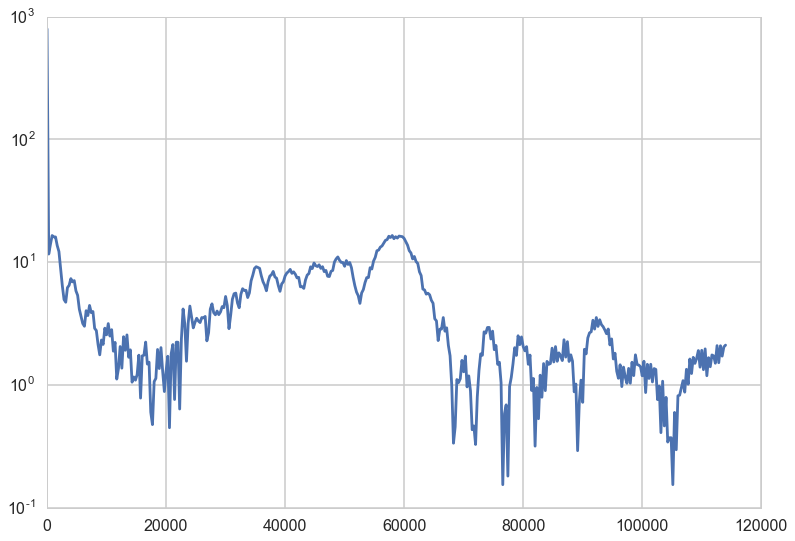

In [291]:
size = fiducial_with_oscillation.size
freqs = fft.fftshift(fft.fftfreq(size, d=fiducial_time[1]-fiducial_time[0]))
midpoint = size/2
plt.semilogy(freqs[midpoint:midpoint+400], np.abs(fft.fftshift(fft.fft(fiducial_with_oscillation))[midpoint:midpoint+400]))


# Let's  look only at the region after the current ramps up

In [292]:
from scipy.signal import blackman

In [293]:
window_with_oscillation = fiducial_with_oscillation[35500:60000]

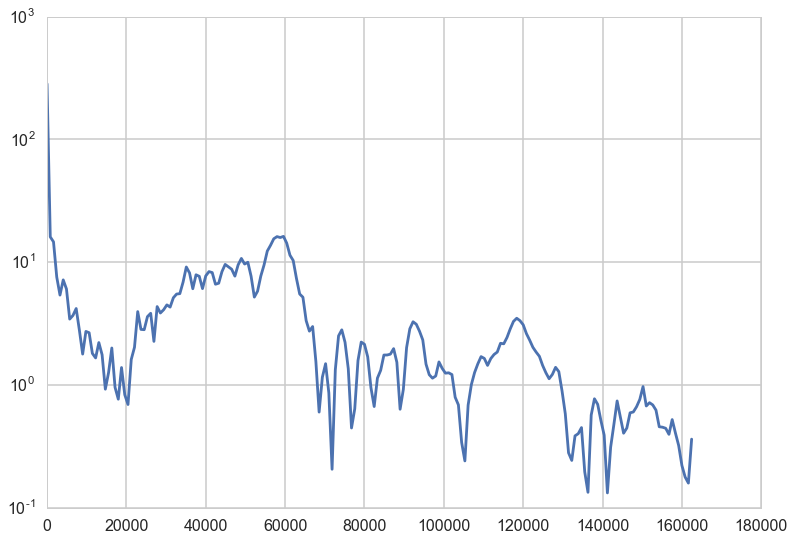

In [294]:
size = window_with_oscillation.size
freqs = fft.fftshift(fft.fftfreq(size, d=fiducial_time[1]-fiducial_time[0]))
midpoint = size/2
plt.semilogy(freqs[midpoint:midpoint+200], np.abs(fft.fftshift(fft.fft(window_with_oscillation))[midpoint:midpoint+200]))

# Let's see if multiplying by a window function helps remove some other frequencies due to edge effects.

In [295]:
windowed = blackman(40000)*fiducial[20000:60000]
#windowed = fiducial[30000:60000]
#windowed = np.pad(windowed, 100000, mode='symmetric')

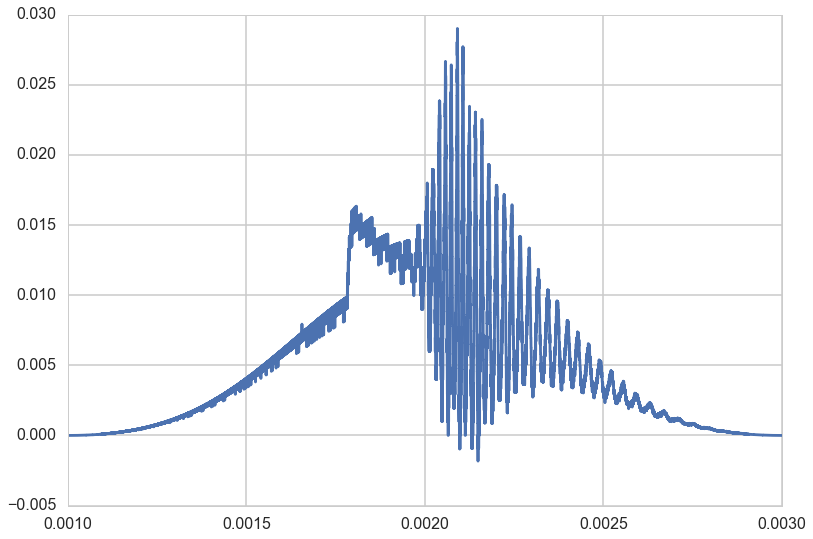

In [296]:
plt.plot(fiducial_time[20000:60000], windowed)

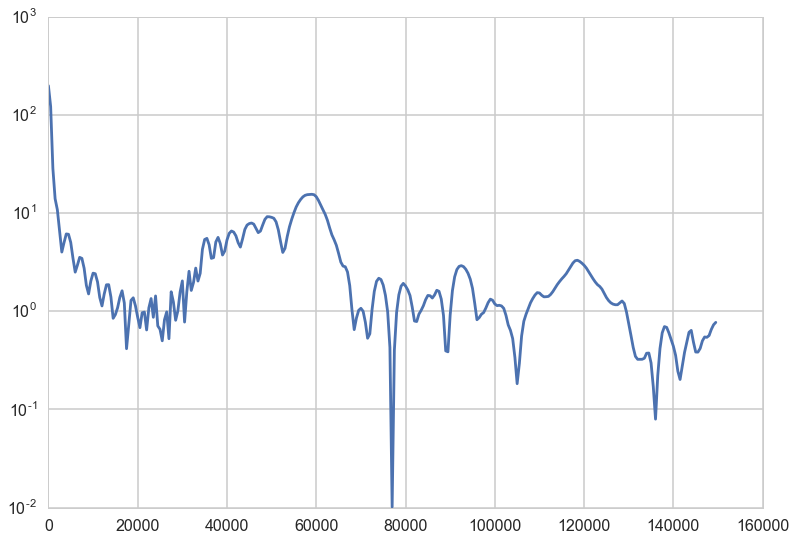

In [297]:
size = windowed.size
freqs = fft.fftshift(fft.fftfreq(size, d=fiducial_time[1]-fiducial_time[0]))
midpoint = size/2
plt.semilogy(freqs[midpoint:midpoint+300], np.abs(fft.fftshift(fft.fft(windowed))[midpoint:midpoint+300]))

# Let's look at a shot without oscillation or only a weak oscillation

In [298]:
tree = mds.Tree('rsx', 15557)
fiducial_node = tree.getNode(fiducial_a_node_name)
fiducial_data = fiducial_node.getData()
fiducial_wo_oscillation = np.asarray(fiducial_data.getValue())
fiducial_time = np.asarray(fiducial_data.getDimensions()[0])*1e-3

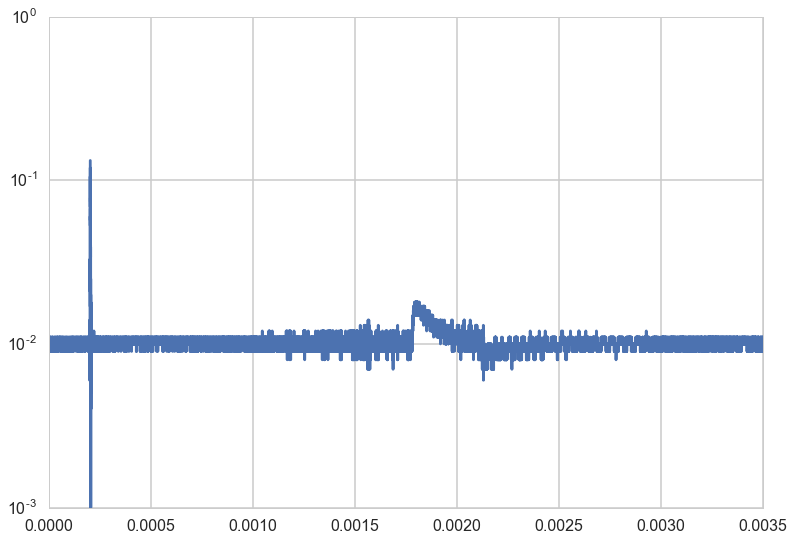

In [299]:
plt.semilogy(fiducial_time, fiducial_wo_oscillation)

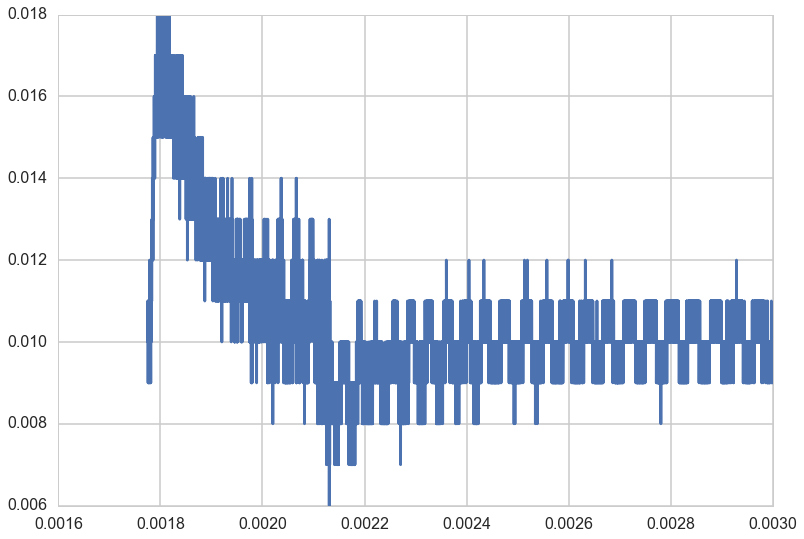

In [300]:
window_wo_oscillation = fiducial_wo_oscillation[35500:60000]
plt.plot(fiducial_time[35500:60000], window_wo_oscillation)

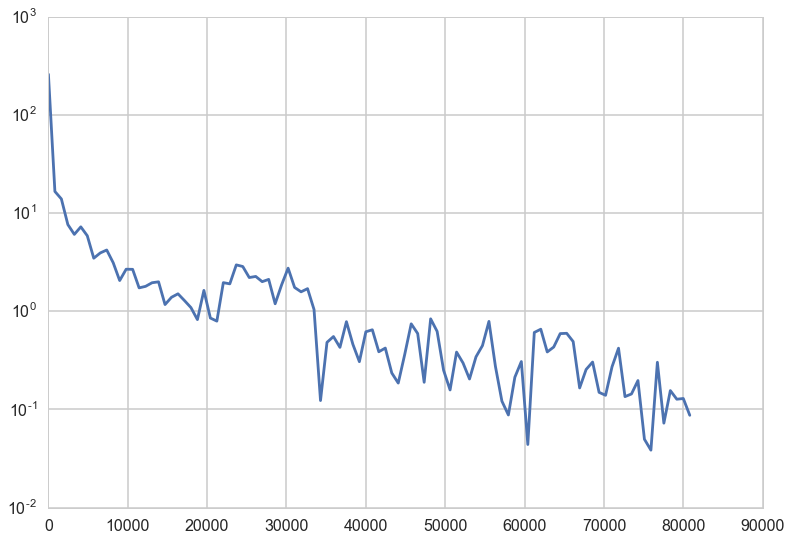

In [289]:
size = window_wo_oscillation.size
freqs = fft.fftshift(fft.fftfreq(size, d=fiducial_time[1]-fiducial_time[0]))
midpoint = size/2
plt.semilogy(freqs[midpoint:midpoint+100], np.abs(fft.fftshift(fft.fft(window_wo_oscillation))[midpoint:midpoint+100]))

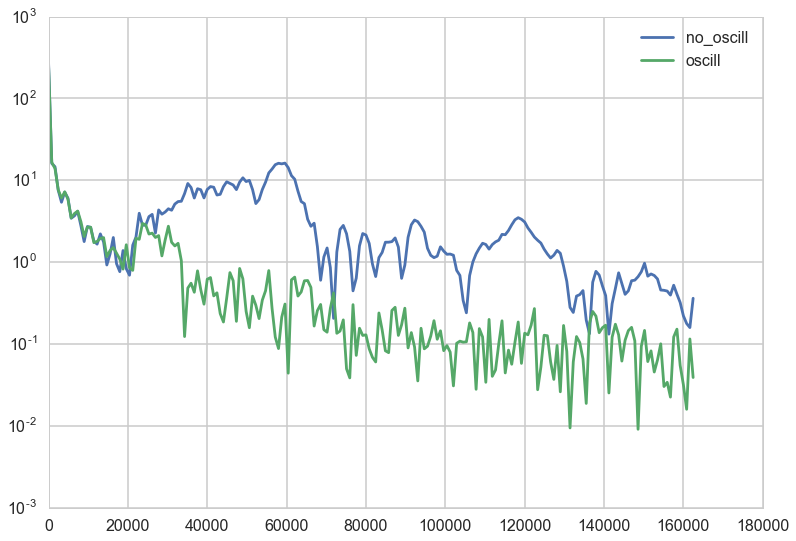

In [304]:
size = window_with_oscillation.size
freqs = fft.fftshift(fft.fftfreq(size, d=fiducial_time[1]-fiducial_time[0]))
midpoint = size/2
plt.semilogy(freqs[midpoint:midpoint+200], np.abs(fft.fftshift(fft.fft(window_with_oscillation))[midpoint:midpoint+200]), label='no_oscill')
plt.semilogy(freqs[midpoint:midpoint+200], np.abs(fft.fftshift(fft.fft(window_wo_oscillation))[midpoint:midpoint+200]), label='oscill')
plt.legend()

# Now let's see if we can detect if there is an oscillation before the crowbar

## Shot 16670 has inly 3 periods before crowbar, Shot 17300 has many, Shot 15557 none 

### First look at crowbar time

0.002115


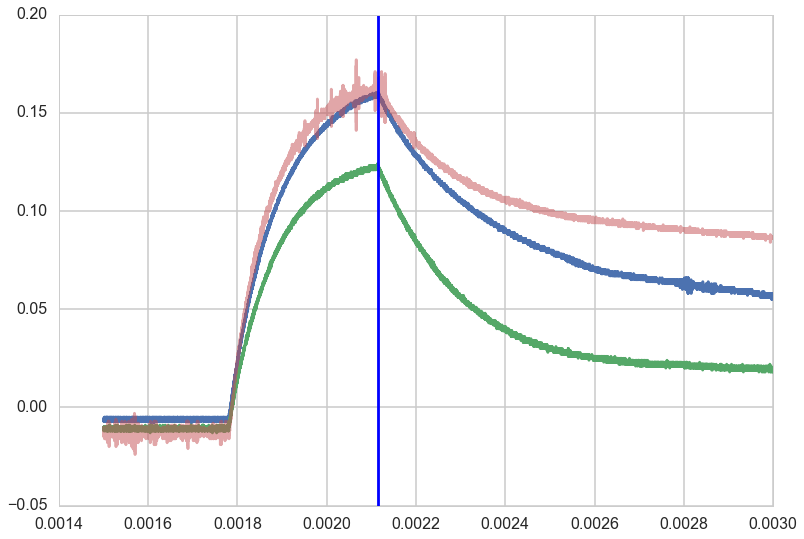

In [327]:
tree = mds.Tree('rsx', 16670)
bias_current_node = tree.getNode(bias_current_node_name)
bias_current_data = bias_current_node.getData()
bias_current_short_oscillation = np.asarray(bias_current_data.getValue())
bias_current_time = np.asarray(bias_current_data.getDimensions()[0])*1e-3

tree = mds.Tree('rsx', 17300)
bias_current_node = tree.getNode(bias_current_node_name)
bias_current_data = bias_current_node.getData()
bias_current_long_oscillation = np.asarray(bias_current_data.getValue())
bias_current_time = np.asarray(bias_current_data.getDimensions()[0])*1e-3

tree = mds.Tree('rsx', 15557)
bias_current_node = tree.getNode(bias_current_node_name)
bias_current_data = bias_current_node.getData()
bias_current_no_oscillation = np.asarray(bias_current_data.getValue())
bias_current_time = np.asarray(bias_current_data.getDimensions()[0])*1e-3

time_slice = slice(30000, 60000)
plt.plot(bias_current_time[time_slice], bias_current_short_oscillation[time_slice])
plt.plot(bias_current_time[time_slice], bias_current_long_oscillation[time_slice])
plt.plot(bias_current_time[time_slice], bias_current_no_oscillation[time_slice], alpha=0.5)
plt.axvline(0.002115)

print bias_current_time[42300]

### The crowbar time is very reproducible across shots from the whole range

### The crowbar occurs at $t=0.002115 s$ or index 42300

# Now look at the fft of windows up to index 42300

In [381]:
tree = mds.Tree('rsx', 16670)
fiducial_node = tree.getNode(fiducial_a_node_name)
fiducial_data = fiducial_node.getData()
fiducial_short_oscillation = np.asarray(fiducial_data.getValue())
fiducial_time = np.asarray(fiducial_data.getDimensions()[0])*1e-3
tree = mds.Tree('rsx', 17300)
fiducial_node = tree.getNode(fiducial_a_node_name)
fiducial_data = fiducial_node.getData()
fiducial_long_oscillation = np.asarray(fiducial_data.getValue())
fiducial_time = np.asarray(fiducial_data.getDimensions()[0])*1e-3
tree = mds.Tree('rsx', 15557)
fiducial_node = tree.getNode(fiducial_a_node_name)
fiducial_data = fiducial_node.getData()
fiducial_no_oscillation = np.asarray(fiducial_data.getValue())
fiducial_time = np.asarray(fiducial_data.getDimensions()[0])*1e-3

In [382]:
window_short_oscillation = fiducial_short_oscillation[35500:42300]
window_long_oscillation = fiducial_long_oscillation[35500:42300]
window_no_oscillation = fiducial_no_oscillation[35500:42300]

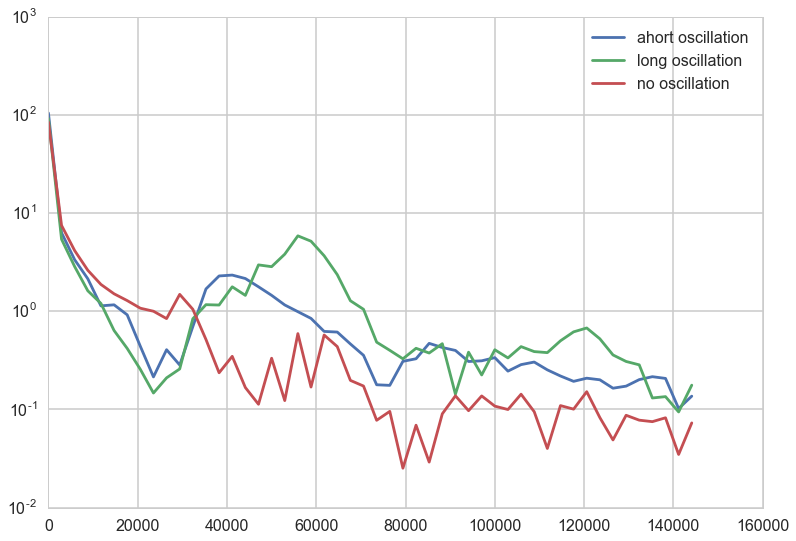

In [385]:
size = window_short_oscillation.size
freqs = fft.fftshift(fft.fftfreq(size, d=fiducial_time[1]-fiducial_time[0]))
midpoint = size/2
plt.semilogy(freqs[midpoint:midpoint+50], np.abs(fft.fftshift(fft.fft(window_short_oscillation))[midpoint:midpoint+50]), label='ahort oscillation')
plt.semilogy(freqs[midpoint:midpoint+50], np.abs(fft.fftshift(fft.fft(window_long_oscillation))[midpoint:midpoint+50]), label='long oscillation')
plt.semilogy(freqs[midpoint:midpoint+50], np.abs(fft.fftshift(fft.fft(window_no_oscillation))[midpoint:midpoint+50]), label='no oscillation')
plt.legend()

In [386]:
window_short_oscillation = fiducial_short_oscillation[25500:42300]
window_long_oscillation = fiducial_long_oscillation[25500:42300]
window_no_oscillation = fiducial_no_oscillation[25500:42300]

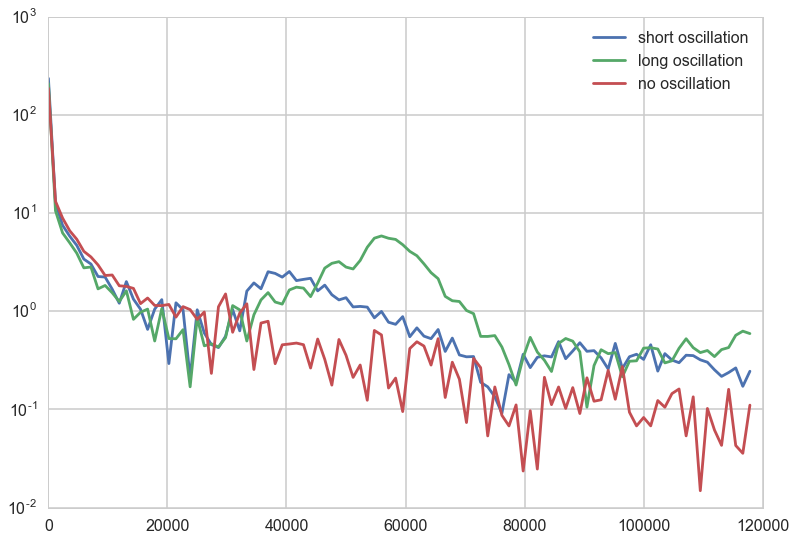

In [389]:
size = window_short_oscillation.size
freqs = fft.fftshift(fft.fftfreq(size, d=fiducial_time[1]-fiducial_time[0]))
midpoint = size/2
plt.semilogy(freqs[midpoint:midpoint+100], np.abs(fft.fftshift(fft.fft(window_short_oscillation))[midpoint:midpoint+100]), label='short oscillation')
plt.semilogy(freqs[midpoint:midpoint+100], np.abs(fft.fftshift(fft.fft(window_long_oscillation))[midpoint:midpoint+100]), label='long oscillation')
plt.semilogy(freqs[midpoint:midpoint+100], np.abs(fft.fftshift(fft.fft(window_no_oscillation))[midpoint:midpoint+100]), label='no oscillation')
plt.legend()

In [390]:
1/0.00002195

45558.08656036446

# Look at it quantitivly integrate the spectral power for two standard deviations of period measurements around the period

In [393]:
connection = sqlite3.connect('shots.db')
connection.row_factory = sqlite3.Row
cursor = connection.cursor()
cursor.execute('SELECT shot, period FROM Shots WHERE shot=15557 OR shot=16670 OR shot=17300')
shots = cursor.fetchall()

periods = np.zeros(3)
for shot in shots:
    if shot['shot'] == 15557:
        index = 0
    if shot['shot'] == 16670:
        index = 1
    if shot['shot'] == 17300:
        index = 2
    periods[index] = shot['period']

In [460]:
frequencies = 1/periods

In [461]:
std = cleaned_periods.std()

In [462]:
std_frequencies = cleaned_frequencies.std()

In [463]:
std_frequencies

8386.4338684326958

In [465]:
size = window_short_oscillation.size
freqs = fft.fftshift(fft.fftfreq(size, d=fiducial_time[1]-fiducial_time[0]))

range_no_oscillation = np.where(np.logical_and(frequencies[0] - std_frequencies <= freqs, freqs <= frequencies[0] + std_frequencies))
range_short_oscillation = np.where(np.logical_and(frequencies[1] - std_frequencies <= freqs, freqs <= frequencies[1] + std_frequencies))
range_long_oscillation = np.where(np.logical_and(frequencies[2] - std_frequencies < freqs, freqs <= frequencies[2] + std_frequencies))

In [467]:
freqs[range_no_oscillation]

array([ 36904.76147349,  38095.23765005,  39285.71382662,  40476.19000318,
        41666.66617975,  42857.14235631,  44047.61853287,  45238.09470944,
        46428.570886  ,  47619.04706257,  48809.52323913,  49999.9994157 ,
        51190.47559226,  52380.95176882])

In [468]:
no_oscillation_fft[range_no_oscillation].size

14

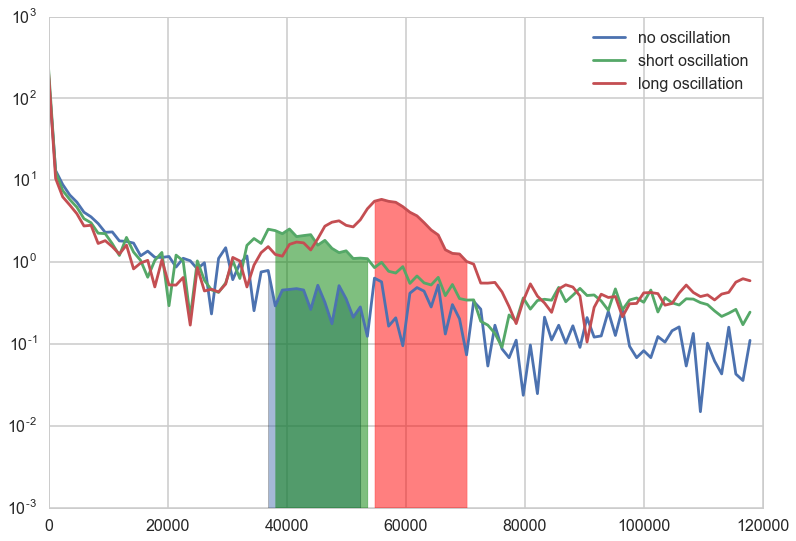

In [480]:
size = window_short_oscillation.size
freqs = fft.fftshift(fft.fftfreq(size, d=fiducial_time[1]-fiducial_time[0]))
midpoint = size/2

no_oscillation_fft = np.abs(fft.fftshift(fft.fft(window_no_oscillation)))
short_oscillation_fft = np.abs(fft.fftshift(fft.fft(window_short_oscillation)))
long_oscillation_fft = np.abs(fft.fftshift(fft.fft(window_long_oscillation)))

plt.semilogy(freqs[midpoint:midpoint+100], no_oscillation_fft[midpoint:midpoint+100], label='no oscillation')
plt.fill_between(freqs[range_no_oscillation], no_oscillation_fft[range_no_oscillation], 1e-3, alpha=0.5)
plt.semilogy(freqs[midpoint:midpoint+100], short_oscillation_fft[midpoint:midpoint+100], label='short oscillation')
plt.fill_between(freqs[range_short_oscillation], short_oscillation_fft[range_short_oscillation], 1e-3, alpha=0.5, color='g')
plt.semilogy(freqs[midpoint:midpoint+100], long_oscillation_fft[midpoint:midpoint+100], label='long oscillation')
plt.fill_between(freqs[range_long_oscillation], long_oscillation_fft[range_long_oscillation], 1e-3, alpha=0.5, color='r')
plt.legend()

In [474]:
from scipy.integrate import cumtrapz

# Integrated spectral power

In [477]:
cumtrapz(no_oscillation_fft[range_no_oscillation], freqs[range_no_oscillation])[0]

643.65139277184824

In [478]:
cumtrapz(short_oscillation_fft[range_short_oscillation], freqs[range_short_oscillation])[0]

2765.1599152176291

In [481]:
cumtrapz(long_oscillation_fft[range_long_oscillation], freqs[range_long_oscillation])[0]

6770.7424280843888

# Better Units 

In [484]:
import scipy.signal

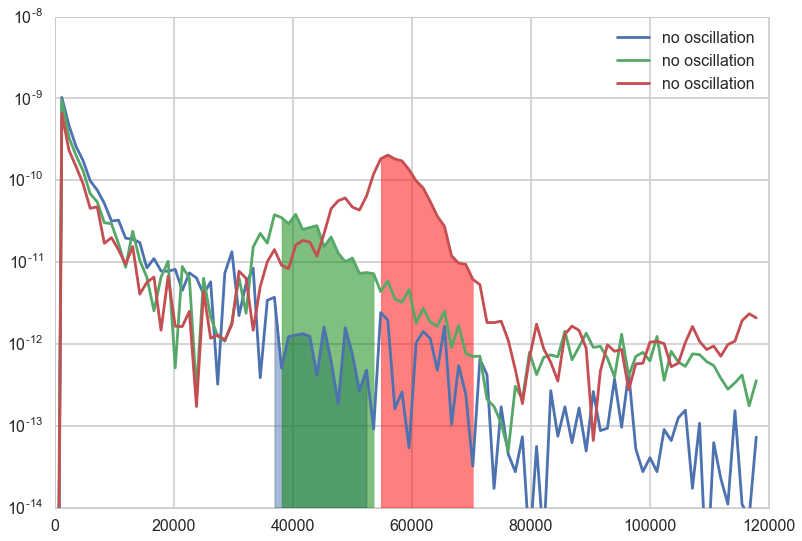

In [498]:
fs = 1/(fiducial_time[1] - fiducial_time[0])

freqs, no_oscillation_fft = scipy.signal.periodogram(window_no_oscillation, fs)
freqs, short_oscillation_fft = scipy.signal.periodogram(window_short_oscillation, fs)
freqs, long_oscillation_fft = scipy.signal.periodogram(window_long_oscillation, fs)

range_no_oscillation = np.where(np.logical_and(frequencies[0] - std_frequencies <= freqs, freqs <= frequencies[0] + std_frequencies))
range_short_oscillation = np.where(np.logical_and(frequencies[1] - std_frequencies <= freqs, freqs <= frequencies[1] + std_frequencies))
range_long_oscillation = np.where(np.logical_and(frequencies[2] - std_frequencies < freqs, freqs <= frequencies[2] + std_frequencies))

plt.semilogy(freqs[:100], no_oscillation_fft[:100], label='no oscillation')
plt.semilogy(freqs[:100], short_oscillation_fft[:100], label='no oscillation')
plt.semilogy(freqs[:100], long_oscillation_fft[:100], label='no oscillation')
plt.fill_between(freqs[range_no_oscillation], no_oscillation_fft[range_no_oscillation], 1e-14, alpha=0.5)
#plt.semilogy(freqs[midpoint:midpoint+100], short_oscillation_fft[midpoint:midpoint+100], label='short oscillation')
plt.fill_between(freqs[range_short_oscillation], short_oscillation_fft[range_short_oscillation], 1e-14, alpha=0.5, color='g')
#plt.semilogy(freqs[midpoint:midpoint+100], long_oscillation_fft[midpoint:midpoint+100], label='long oscillation')
plt.fill_between(freqs[range_long_oscillation], long_oscillation_fft[range_long_oscillation], 1e-14, alpha=0.5, color='r')
plt.legend()
plt.ylim((1e-14, 1e-8))
plt.show()

In [499]:
cumtrapz(no_oscillation_fft[range_no_oscillation], freqs[range_no_oscillation])[0]

2.5096794079060299e-09

In [500]:
cumtrapz(short_oscillation_fft[range_short_oscillation], freqs[range_short_oscillation])[0]

3.8303441485162321e-08

In [501]:
cumtrapz(long_oscillation_fft[range_long_oscillation], freqs[range_long_oscillation])[0]

2.2937349502820847e-07

# Can we determine crowbar time and other features of bias current; Attempt to curve fit 

In [9]:
tree = mds.Tree('rsx', 17555)
bias_current_node = tree.getNode(bias_current_node_name)
bias_current_data = bias_current_node.getData()
bias_current = np.asarray(bias_current_data.getValue())
bias_current_time = np.asarray(bias_current_data.getDimensions()[0])*1e-3

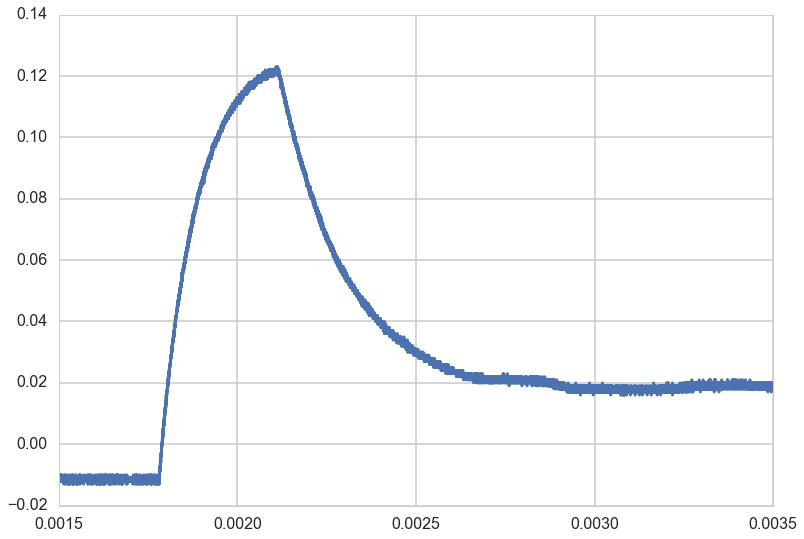

In [10]:
plt.plot(bias_current_time[30000:], bias_current[30000:])

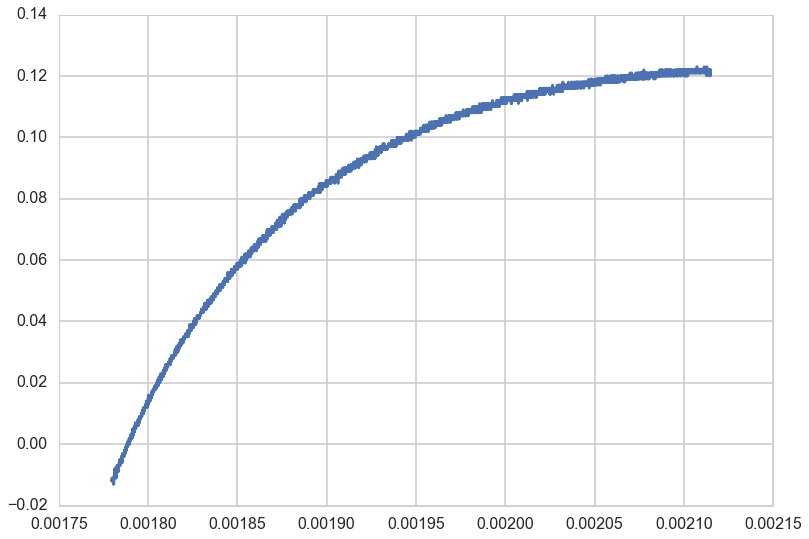

In [27]:
plt.plot(bias_current_time[35590:42300], bias_current[35590:42300])

In [12]:
from scipy.optimize import curve_fit

In [22]:
def decay_sin(t, a, k, freq, phase, offset):
    return a*np.exp(-k*t) * np.sin(freq*2.*np.pi*t + phase) + offset

In [59]:
bounds = ([0, 0, 800, -1.9*833*2*np.pi*bias_current_time[35900], -0.05], [0.2, 1, 850, -0.9*833*2*np.pi*bias_current_time[35900], 0.05])
p0 = [bias_current[42300], 1, 833, -833*2*np.pi*bias_current_time[35900], 0]
curve_fit(decay_sin, bias_current_time[35900:42300], bias_current[35900:42300], p0=p0, bounds=bounds)

(array([  9.75107385e-02,   1.00000000e+00,   8.33000000e+02,
         -9.39483883e+00,   2.71048051e-02]),
 array([[  3.49879018e-08,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,  -2.30503304e-08],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [ -2.30503304e-08,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   1.95948480e-08]]))

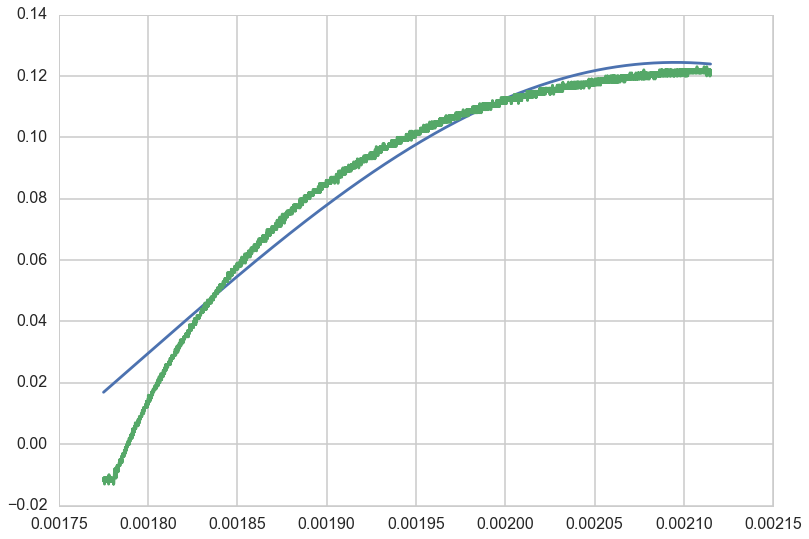

In [61]:
plt.plot(bias_current_time[35500:42300], decay_sin(bias_current_time[35500:42300], 
                                                   9.75107385e-02,
                                                    1.00000000e+00,
                                                   8.33000000e+02,
                                                   -9.39483883e+00,
                                                   2.71048051e-02))
plt.plot(bias_current_time[35500:42300], bias_current[35500:42300])

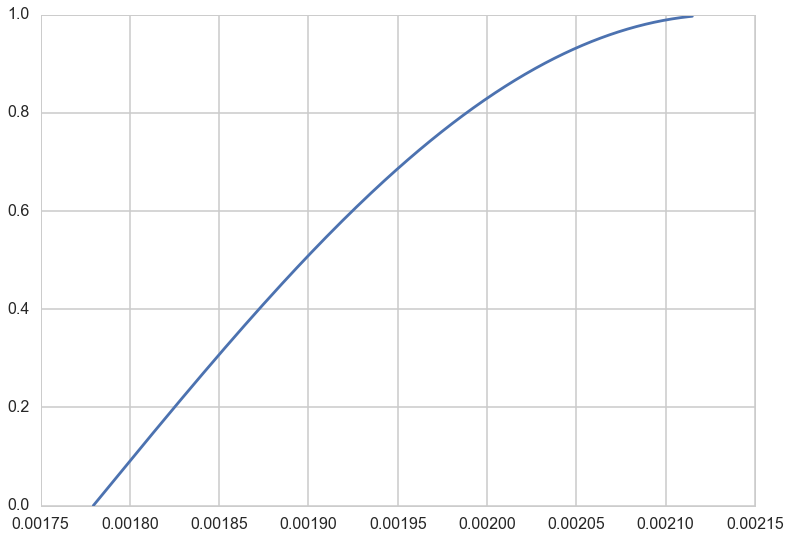

In [54]:
plt.plot(bias_current_time[35590:42300], np.sin(706*2*np.pi * bias_current_time[35590:42300] - 706*np.pi*2*bias_current_time[35590]))

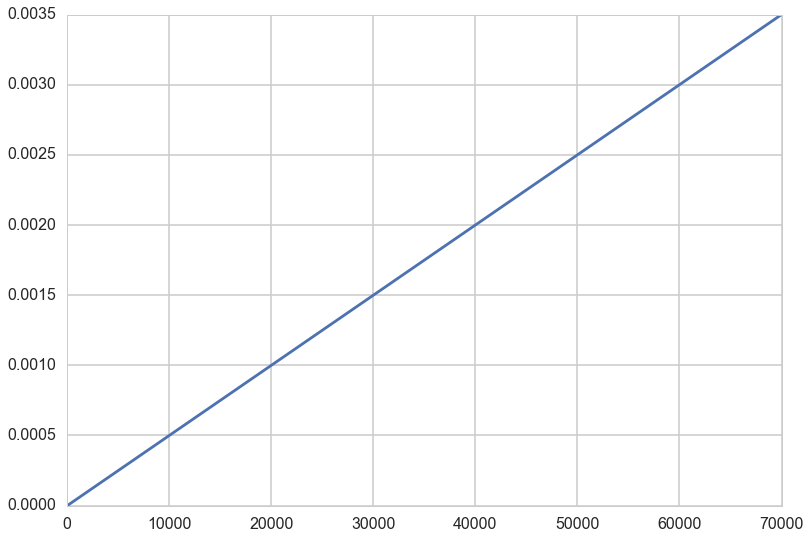

In [76]:
plt.plot(bias_current_time)